In [1]:
%matplotlib inline
import seaborn as sns

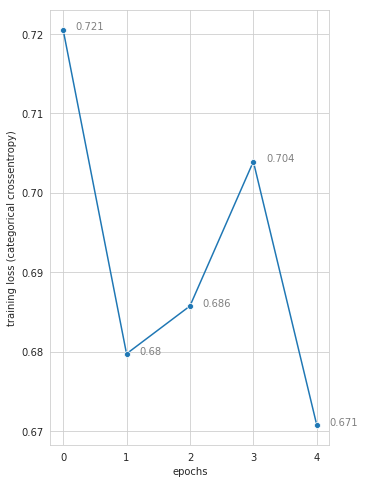

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import json
_data = None
sns.set_style("whitegrid")
with open("./training_cycle.json", "r") as f:
    _data = json.loads(f.read())
data = _data["training_losses"]
width = len(data)
if (width > 16):
    width = 16
plt.figure(figsize=(width, 8))
g = sns.lineplot(range(len(data)), data, marker="o")
g.set(xticks = range(len(data)))
g.set(xlabel = "epochs")
g.set(ylabel = "training loss (categorical crossentropy)")
for i in range(len(data)):
    g.text(i+0.2, data[i], 
           str(np.round(data[i], 3)), 
           horizontalalignment='left', 
           size='medium', 
           color='gray', weight='light')